In [ ]:
#import libraries for nerualnet, math and visualization
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
print(tf.__version__)

2.7.0


In [ ]:
#set seed just for the demonstration
#tf.random.set_seed(1000);
#load in the MNIST dataset for training and testing
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

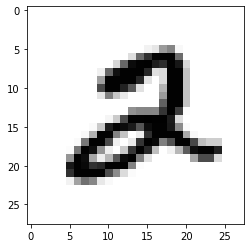

In [ ]:
#Plot an image to see what it looks like
plt.figure()
plt.imshow(train_images[5], cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [ ]:
#TODO: Modify the CNN structure for a slimer network
#Build the neuralnet model
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Flatten())
#model.add(layers.Dense(10, activation='softmax'))

In [ ]:
#diem
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(6, (3, 3), activation='relu', padding='same'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
#Review the overall model structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
#Review the overall model structure
#model.summary()

In [ ]:
#Reshape the image so it can train in batch (and fit the model's input shape)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
#Training the model
#Hint: change optimizer to 'sgd', and increase epochs if result is bad.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.4031 - accuracy: 0.9380
Epoch 2/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0764 - accuracy: 0.9767
Epoch 3/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0581 - accuracy: 0.9822
Epoch 4/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0494 - accuracy: 0.9845
Epoch 5/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0414 - accuracy: 0.9873
Epoch 6/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0405 - accuracy: 0.9877
Epoch 7/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0383 - accuracy: 0.9881
Epoch 8/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0301 - accuracy: 0.9905
Epoch 9/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0295 - accuracy: 0.9909
Epoch 10/20
1875/1875 [==============================] - 44s 23m

In [ ]:
#Evaluate the performance with testing dataset
print("Accuracy of this model is:")
model.evaluate(test_images, test_labels)

Accuracy of this model is:
313/313 [==============================] - 3s 10ms/step - loss: 0.1385 - accuracy: 0.9842


[0.13846145570278168, 0.9842000007629395]

In [ ]:
#View the total number of parameters, so it doesn't overflow the LCDK's memory
print("Total amount of parameter of model is:", model.count_params())

Total amount of parameter of model is: 20490


In [ ]:
#Example for extract parameter form the first conv layer
#TODO: you need to actually modify model.layers[XXXX], this XXX to fit your actually layer number
t1, t2 = model.layers[0].get_weights()
np.savetxt('w1.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('b1.txt', t2.flatten(), delimiter=',',fmt='%.16f') 

In [ ]:
#Example for extract parameter form the second conv layer
#TODO: you need to actually modify model.layers[XXXX], this XXX to fit your actually layer number
#And do it multiple times to save all the layer with parameters
t1, t2 = model.layers[2].get_weights()
np.savetxt('w2.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('b2.txt', t2.flatten(), delimiter=',',fmt='%.16f') 

In [ ]:
# t1, t2 = model.layers[4].get_weights()
# np.savetxt('w3.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
# np.savetxt('b3.txt', t2.flatten(), delimiter=',',fmt='%.16f') 

In [ ]:
t1, t2 = model.layers[5].get_weights()
np.savetxt('fc.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('bc.txt', t2.flatten(), delimiter=',',fmt='%.16f') 

In [ ]:
import cv2

In [ ]:
im = cv2.imread("num7.bmp")
im = cv2.flip(im,0)
im = im[:,:,0]
for i in range (28):
  for j in range (28):
    im[i,j]=255 -im[i,j]


In [ ]:
im.shape

(28, 28)

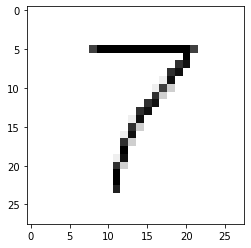

In [ ]:
plt.imshow(im, cmap=plt.cm.binary)

In [ ]:
im = im.reshape(1,28,28,1)

In [ ]:
model.predict(im)

array([[6.9705730e-35, 1.5201940e-16, 1.3742151e-22, 2.0156587e-24,
        1.5461872e-13, 1.7622024e-19, 2.1085472e-21, 1.0000000e+00,
        2.8086321e-19, 6.5138695e-19]], dtype=float32)